https://youtu.be/wQ8BIBpya2k

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Import mnist dataset of digits
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



In [ ]:
# Use sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # Flatten layer, rather than use numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Dense layer, 128 units (neurons), rectified linear activation fnc
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Second layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer, softmax as probability distribution

# Parameters for training the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) # could use binary_categorical_crossentropy for binary classification

# Train model
model.fit(x_train, y_train, epochs=3)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

In [ ]:
# Show a sample impage
plt.imshow(x_train[0], cmap='Greys_r')
plt.show()

In [ ]:
# Save the model tf.keras.models.save_model
# https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
tf.keras.models.save_model(model, 'epic_num_reader.model',overwrite=True)

In [9]:
# Load model with tf.keras.models.load_model
new_model = tf.keras.models.load_model('epic_num_reader.model',compile=False)

In [10]:
# Get predictions
predictions = new_model.predict(x_test)

In [11]:
print(predictions)

[[8.05854139e-09 8.74029737e-08 2.04835505e-05 ... 9.99975681e-01
  9.66938742e-08 6.32725460e-07]
 [5.98047265e-08 4.82808711e-04 9.99513745e-01 ... 8.76619932e-09
  1.07132280e-06 3.06389289e-11]
 [3.08045401e-07 9.99680042e-01 1.03460889e-06 ... 2.12405921e-05
  4.22021403e-05 1.45763738e-06]
 ...
 [2.88738455e-09 1.00229315e-07 6.59273525e-08 ... 8.28222164e-06
  7.68194695e-06 6.99918019e-05]
 [4.22212487e-09 4.36558167e-09 6.93266486e-11 ... 4.14066503e-10
  1.97409408e-05 2.63680828e-08]
 [2.04479556e-06 3.63225645e-08 3.76662769e-07 ... 6.44564235e-10
  2.22520612e-06 4.37258052e-08]]


In [7]:
print(np.argmax(predictions[0]))

7


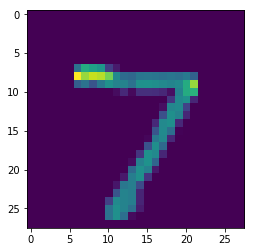

In [8]:
plt.imshow(x_test[0])
plt.show()